In [3]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [5]:
data0.shape


(10000, 18)

In [6]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [7]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [8]:
list_drop= ['Domain','Web_Forwards','Right_Click','Mouse_Over','Domain_Age','Domain_End','TinyURL','https_Domain','Redirection']
data=data0.drop(list_drop, axis=1, inplace=True)

In [9]:
data0.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
iFrame           0
Label            0
dtype: int64

In [10]:
data0.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Prefix/Suffix,DNS_Record,Web_Traffic,iFrame,Label
0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0
3,0,0,1,3,0,0,1,0,0
4,0,0,1,3,0,0,1,0,0


In [11]:
data0 = data0.sample(frac=1).reset_index(drop=True)
data0.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Prefix/Suffix,DNS_Record,Web_Traffic,iFrame,Label
0,0,0,1,6,0,0,1,0,1
1,0,0,1,4,0,0,1,0,0
2,0,0,1,6,0,0,1,0,0
3,0,0,1,3,0,0,1,0,0
4,0,0,0,0,0,1,1,0,1


In [12]:
y = data0['Label']
X = data0.drop('Label',axis=1)
X.shape, y.shape

((10000, 8), (10000,))

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.shape, X_test.shape

((8000, 8), (2000, 8))

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [40]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [41]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.811
Decision Tree: Accuracy on test Data: 0.823


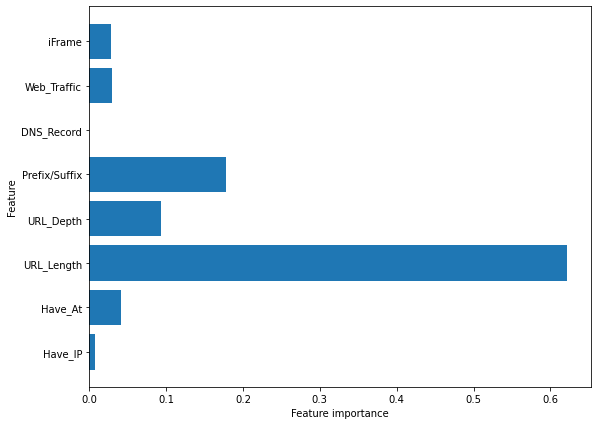

In [28]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

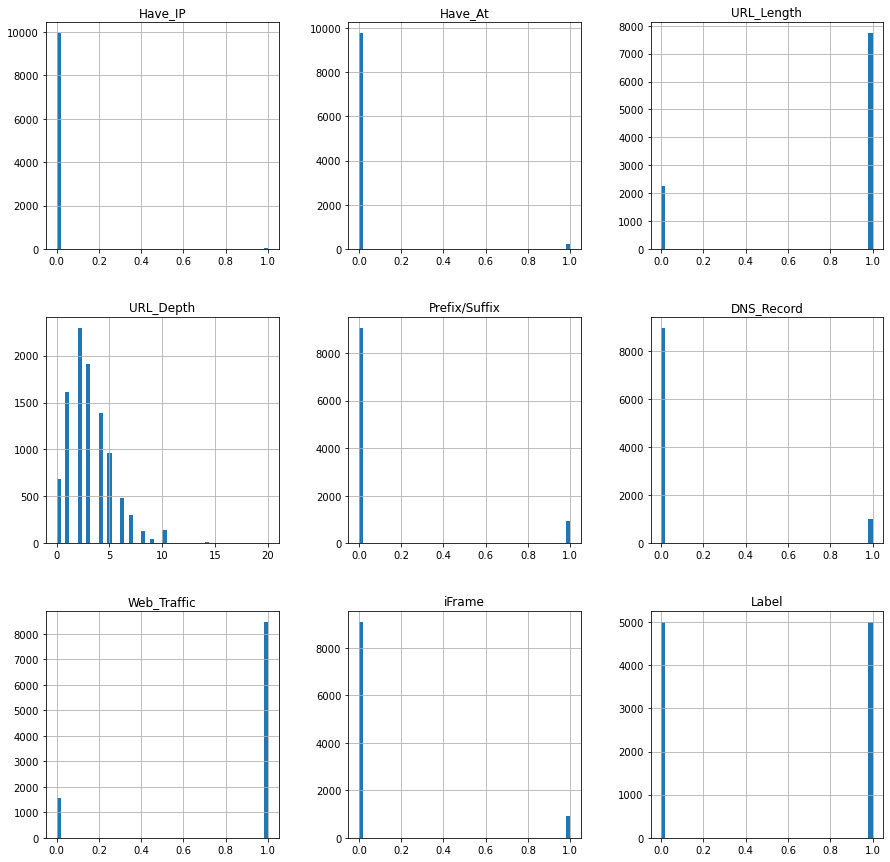

In [42]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [43]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)
